In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 1600)
plt.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (18, 8)

In [2]:
data = pd.read_csv("Stock.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,04-01-2015 16:00,40.60,40.76,40.31,40.72,36865322
1,04-02-2015 16:00,40.66,40.74,40.12,40.29,37487476
2,04-06-2015 16:00,40.34,41.78,40.18,41.55,39223692
3,04-07-2015 16:00,41.61,41.91,41.31,41.53,28809375
4,04-08-2015 16:00,41.48,41.69,41.04,41.42,24753438


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [4]:
data.head()

,Date,Open,High,Low,Close,Volume
0,04-01-2015 16:00,40.60,40.76,40.31,40.72,36865322
1,04-02-2015 16:00,40.66,40.74,40.12,40.29,37487476
2,04-06-2015 16:00,40.34,41.78,40.18,41.55,39223692
3,04-07-2015 16:00,41.61,41.91,41.31,41.53,28809375
4,04-08-2015 16:00,41.48,41.69,41.04,41.42,24753438


## Data Dictionary
- Open - Start price of the stock during the given day
- Close - End price of the stock during the given day
- High - Highest price of the stock during the given day
- Low - Lowest price of the stock during the given day
- Volume - Total no:of transactions i.e total no:of shares of the stock sold during that given day
- Date - Trading date    

In [5]:
data["Date"] = data["Date"].apply(parser.parse)

In [6]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [8]:
data = data.set_index("Date")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [10]:
data.index

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-02 16:00:00',
               '2015-04-06 16:00:00', '2015-04-07 16:00:00',
               '2015-04-08 16:00:00', '2015-04-09 16:00:00',
               '2015-04-10 16:00:00', '2015-04-13 16:00:00',
               '2015-04-14 16:00:00', '2015-04-15 16:00:00',
               ...
               '2021-03-18 16:00:00', '2021-03-19 16:00:00',
               '2021-03-22 16:00:00', '2021-03-23 16:00:00',
               '2021-03-24 16:00:00', '2021-03-25 16:00:00',
               '2021-03-26 16:00:00', '2021-03-29 16:00:00',
               '2021-03-30 16:00:00', '2021-03-31 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

## Initial Data Observations 
- min_date = "2015-04-01 16:00:00"
- max_date = "2021-03-31 16:00:00"  

- The above daily stock data most likely belongs to the US Share market(NYSE & NASDAQ) and which reflects the normal trading hours(9:30am to 4pm(ET)).
- The given daily data mostly belongs to one particular stock traded over time(assumption).
- We are giving the daily stock data corresponding to closing time of US Share market at 4pm(ET).
- Some days are missing as they are most likely due to public holidays(Saturday/Sunday) and also other major holidays observed in the US.
- Some few days are present in the data where the market closes at 1pm(ET) due to holiday

In [11]:
def create_date_feat(df):
    df = df.copy()
    df["date"] = df.index
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['hour'] = df['date'].dt.hour
    df['dayofyear'] = df['date'].dt.dayofyear
    df.drop("date", axis=1, inplace=True)
    
    return df

In [12]:
data = create_date_feat(data)
data.head()

,Open,High,Low,Close,Volume,month,year,hour,dayofyear
Date,,,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,4,2015,16,91
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,4,2015,16,92
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,4,2015,16,96
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,4,2015,16,97
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,4,2015,16,98


In [13]:
data["hour"].unique()

array([16, 13])

In [14]:
# Days where market close at 1pm(ET) due to holiday
data.loc[data["hour"] == 13]

,Open,High,Low,Close,Volume,month,year,hour,dayofyear
Date,,,,,,,,,
2017-11-24 13:00:00,83.01,83.43,82.78,83.26,7425603,11,2017,13,328
2018-07-03 13:00:00,100.48,100.63,98.94,99.05,14670275,7,2018,13,184
2018-11-23 13:00:00,102.17,103.81,102.00,103.07,13823099,11,2018,13,327
2018-12-24 13:00:00,97.68,97.97,93.98,94.13,43935192,12,2018,13,358
2019-07-03 13:00:00,136.80,137.74,136.29,137.46,13629296,7,2019,13,184
2019-11-29 13:00:00,152.10,152.30,151.28,151.38,11977300,11,2019,13,333
2019-12-24 13:00:00,157.48,157.71,157.12,157.38,8989150,12,2019,13,358
2020-11-27 13:00:00,214.85,216.27,214.04,215.23,14512213,11,2020,13,332
2020-12-24 13:00:00,221.42,223.61,221.20,222.75,10550572,12,2020,13,359


In [15]:
# Descriptive Statistics
data.describe()

,Open,High,Low,Close,Volume,month,year,hour,dayofyear
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000,1511.000000,1511.000000,1511.000000
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07,6.542687,2017.743878,15.982131,183.796161
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07,3.422848,1.762727,0.230917,104.622561
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05,1.000000,2015.000000,13.000000,2.000000
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07,4.000000,2016.000000,16.000000,93.000000
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07,7.000000,2018.000000,16.000000,184.000000
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07,10.000000,2019.000000,16.000000,274.500000
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08,12.000000,2021.000000,16.000000,366.000000


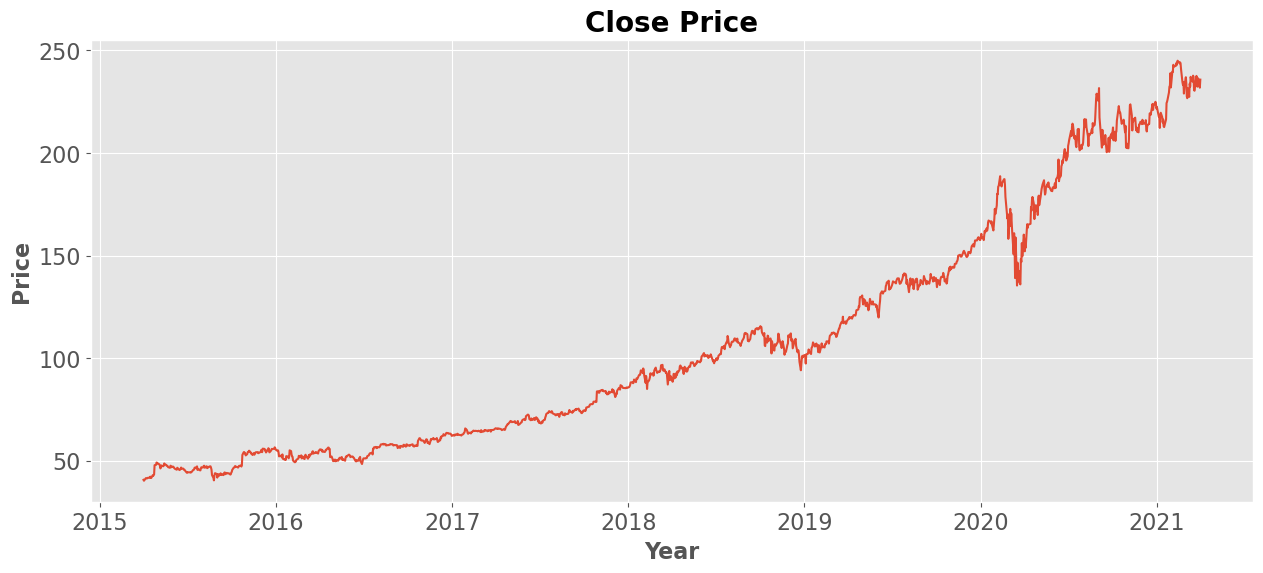

In [16]:
# Daily Close Price Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x=data.index, y=data.Close)

ax.set_title("Close Price", fontsize=20, loc="center", fontdict=dict(weight="bold"))
ax.set_xlabel("Year", fontsize=16, fontdict=dict(weight="bold"))
ax.set_ylabel("Price", fontsize=16, fontdict=dict(weight="bold"))

plt.tick_params(axis="y", which="major", labelsize=16)
plt.tick_params(axis="x", which="major", labelsize=16)
plt.show();

## Observation
- From the above plot, we can see that there is not much of a seaosnal variation year-over-year but there is an increasing trend
as opposed to a cyclical behaviour.A notable decrease in price in early 2020 can be attributed to the COVID-19 pandemic.

In [18]:
# missing values check
data.isnull().sum()/len(data)*100

Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
month        0.0
year         0.0
hour         0.0
dayofyear    0.0
dtype: float64

In [19]:
# duplicate check
dup_index = data[data.index.duplicated()]
data.loc[dup_index.index.values, :]

,Open,High,Low,Close,Volume,month,year,hour,dayofyear
Date,,,,,,,,,


In [20]:
data.index

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-02 16:00:00',
               '2015-04-06 16:00:00', '2015-04-07 16:00:00',
               '2015-04-08 16:00:00', '2015-04-09 16:00:00',
               '2015-04-10 16:00:00', '2015-04-13 16:00:00',
               '2015-04-14 16:00:00', '2015-04-15 16:00:00',
               ...
               '2021-03-18 16:00:00', '2021-03-19 16:00:00',
               '2021-03-22 16:00:00', '2021-03-23 16:00:00',
               '2021-03-24 16:00:00', '2021-03-25 16:00:00',
               '2021-03-26 16:00:00', '2021-03-29 16:00:00',
               '2021-03-30 16:00:00', '2021-03-31 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

## Observation
- There are no missing values and duplicates present in our data so there is no need for additional cleaning
- As trading does not happen on weekends and national holidays due to which there are gaps in our data which we will take care while modeling

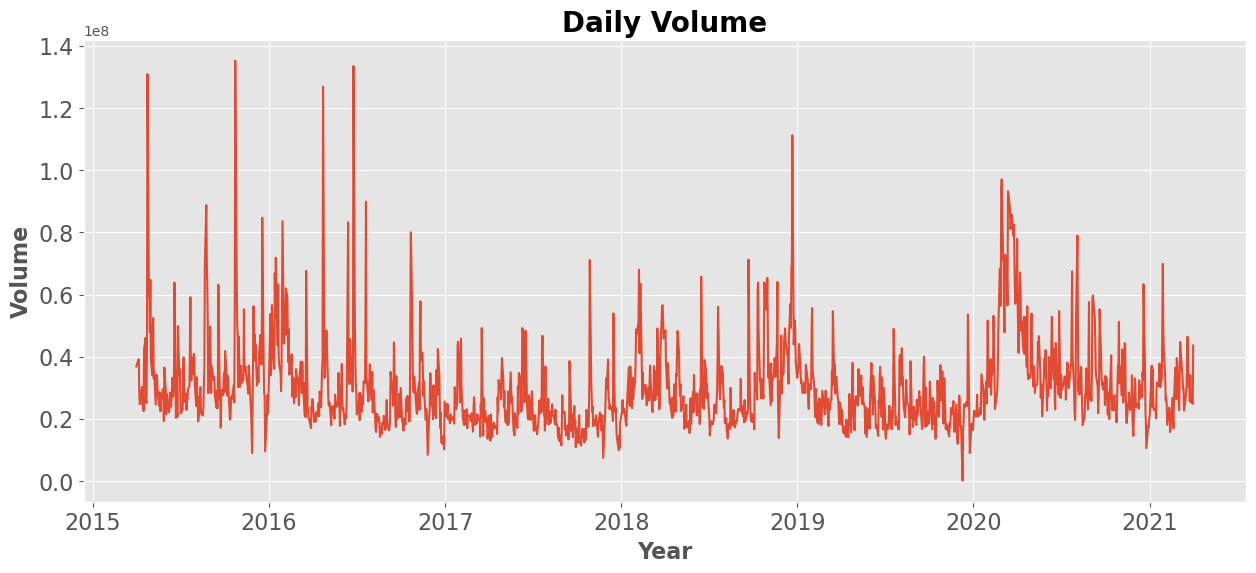

In [21]:
# Daily Volume Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x=data.index, y=data.Volume)

ax.set_title("Daily Volume", fontsize=20, loc="center", fontdict=dict(weight="bold"))
ax.set_xlabel("Year", fontsize=16, fontdict=dict(weight="bold"))
ax.set_ylabel("Volume", fontsize=16, fontdict=dict(weight="bold"))

plt.tick_params(axis="y", which="major", labelsize=16)
plt.tick_params(axis="x", which="major", labelsize=16)
plt.show();

## Observation
- From the above plot, we can see that there is too much noise at the daily level. So we can downsample the data to monthly level to better analyse.

In [22]:
monthly = data["Volume"]
monthly.head()

Date
2015-04-01 16:00:00    36865322
2015-04-02 16:00:00    37487476
2015-04-06 16:00:00    39223692
2015-04-07 16:00:00    28809375
2015-04-08 16:00:00    24753438
Name: Volume, dtype: int64

In [23]:
monthly = monthly.resample("1M").mean().reset_index()

In [24]:
monthly.head()

,Date,Volume
0,2015-04-30,4.164453e+07
1,2015-05-31,3.165364e+07
2,2015-06-30,3.022061e+07
3,2015-07-31,3.297537e+07
4,2015-08-31,3.697607e+07


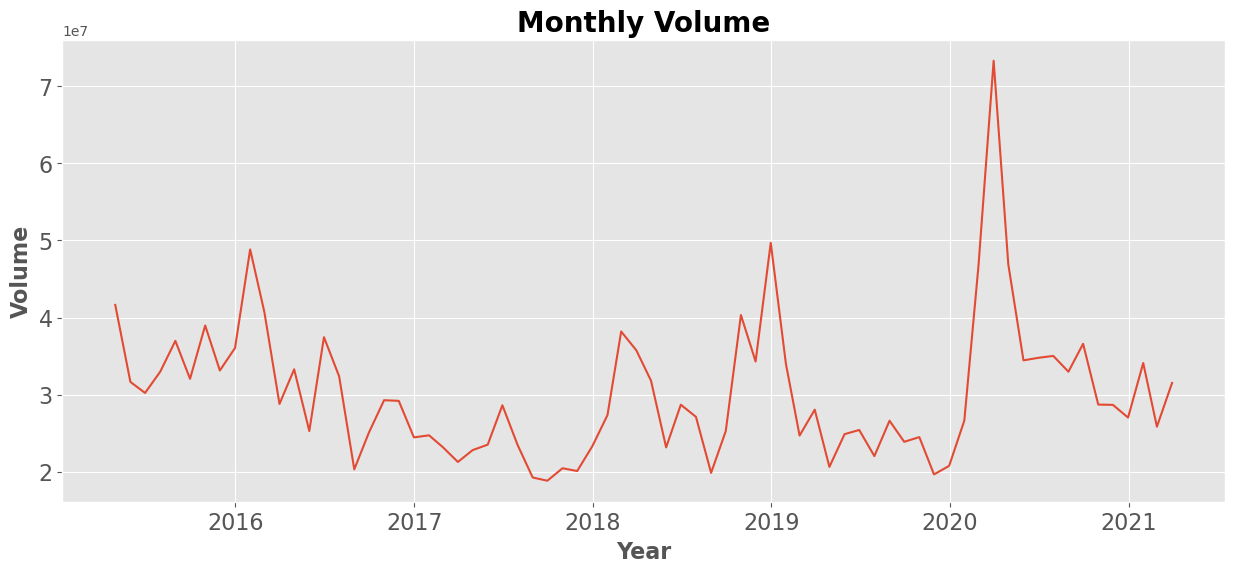

In [25]:
# Monthly Volume Plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x=monthly.Date, y=monthly.Volume)

ax.set_title("Monthly Volume", fontsize=20, loc="center", fontdict=dict(weight="bold"))
ax.set_xlabel("Year", fontsize=16, fontdict=dict(weight="bold"))
ax.set_ylabel("Volume", fontsize=16, fontdict=dict(weight="bold"))

plt.tick_params(axis="y", which="major", labelsize=16)
plt.tick_params(axis="x", which="major", labelsize=16)
plt.show();

## Deep dive on trend and seasonal behavior at year, month levels

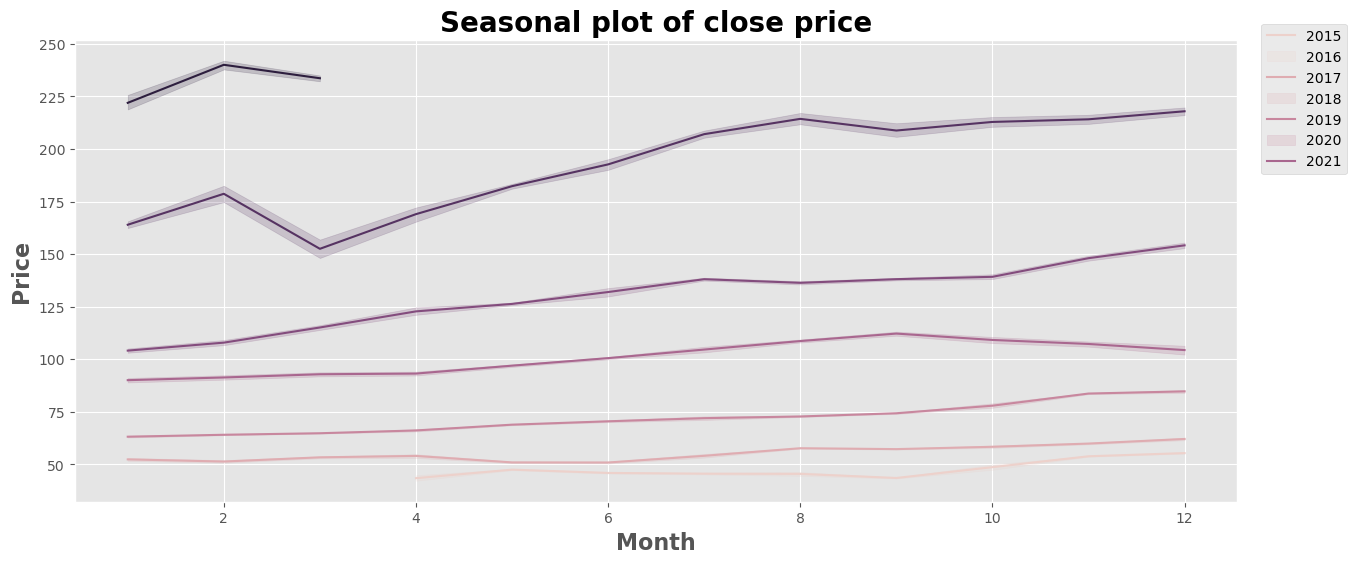

In [26]:
# Seasonal Plots 
fig, ax = plt.subplots(figsize=(15, 6))

## Seasonal line plot
sns.lineplot(x=data.month, y=data.Close, hue=data.year)
ax.set_title("Seasonal plot of close price", fontsize=20, loc="center", fontdict=dict(weight="bold"))
ax.set_xlabel("Month", fontsize=16, fontdict=dict(weight="bold"))
ax.set_ylabel("Price", fontsize=16, fontdict=dict(weight="bold"))
ax.legend(labels=[str(2015+i) for i in range(7)], bbox_to_anchor=(1.1, 1.05));

## Observation
- As we can see from the above plot, 2020 was a very successful year for this company although the COVID pandemic occured in this year due to which we can see a sudden drop in price from february 2020 till April 2020 as this was the period during which the 2020 stock market crash occured as evident from the plot.
- As is evident from the plot, the high performance of this stock in 2020(the close price went up from 150 to 200 dollars) indicates that this stock belongs to one of the tech stocks like Amazon/Microsoft/Netflix etc.. as tech stocks saw a huge boom during this year. This constitutes the most significant increase within the past decade.

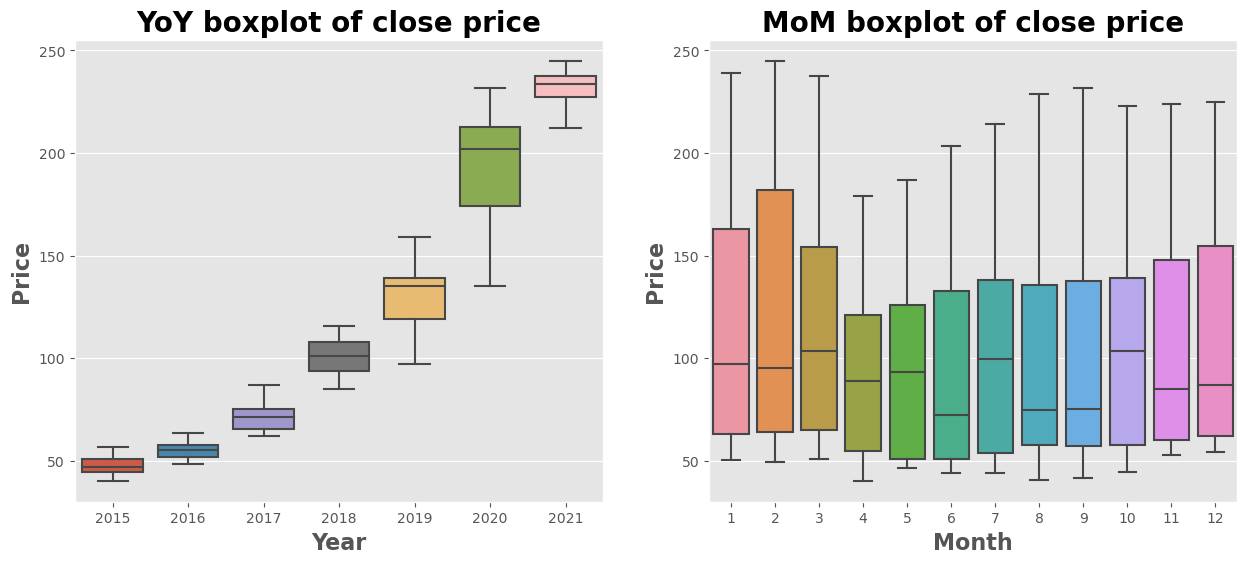

In [27]:
# Seasonal yearly and monthly plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x=data.year, y=data.Close, ax=ax[0])
ax[0].set_title("YoY boxplot of close price", fontsize=20, loc="center", fontdict=dict(weight="bold"))
ax[0].set_xlabel("Year", fontsize=16, fontdict=dict(weight="bold"))
ax[0].set_ylabel("Price", fontsize=16, fontdict=dict(weight="bold"))

sns.boxplot(x=data.month, y=data.Close, ax=ax[1])
ax[1].set_title("MoM boxplot of close price", fontsize=20, loc="center", fontdict=dict(weight="bold"))
ax[1].set_xlabel("Month", fontsize=16, fontdict=dict(weight="bold"))
ax[1].set_ylabel("Price", fontsize=16, fontdict=dict(weight="bold"));

## Observations

### YoY Box Plot
- As is evident from the YoY plot of close price, we can see there is clear upward trend in the closing prices over the last 5 years and the median prices rise significantly each year and is more evident after 2019 onwards suggesting growing volatility as prices increase.
- As is evident from the YoY plot, the clear upward trend and increasing variability suggests that the changes in the series are proportional to the level of the series and as the closing prices increase, the spread and variability also increases which are characteristics of multiplicative effect. 

### MoM Box Plot
- Some months, particularly January and February show higher median prices compared to other months suggesting possible seasonal trends. These months also have larger IQR and maximum prices indicating greater price variability.
- From March to December, the medians and ranges are more consistent with no clear pattern of higher or lower prices in specific months. This suggests that while there may be some seasonality early in the year, the rest of the year does not exhibit strong seasonal effects.

## Time Series Decomposition

In [28]:
from pylab import rcParams
import statsmodels.api as sm

### Multiplicative Seasonal Decomposition

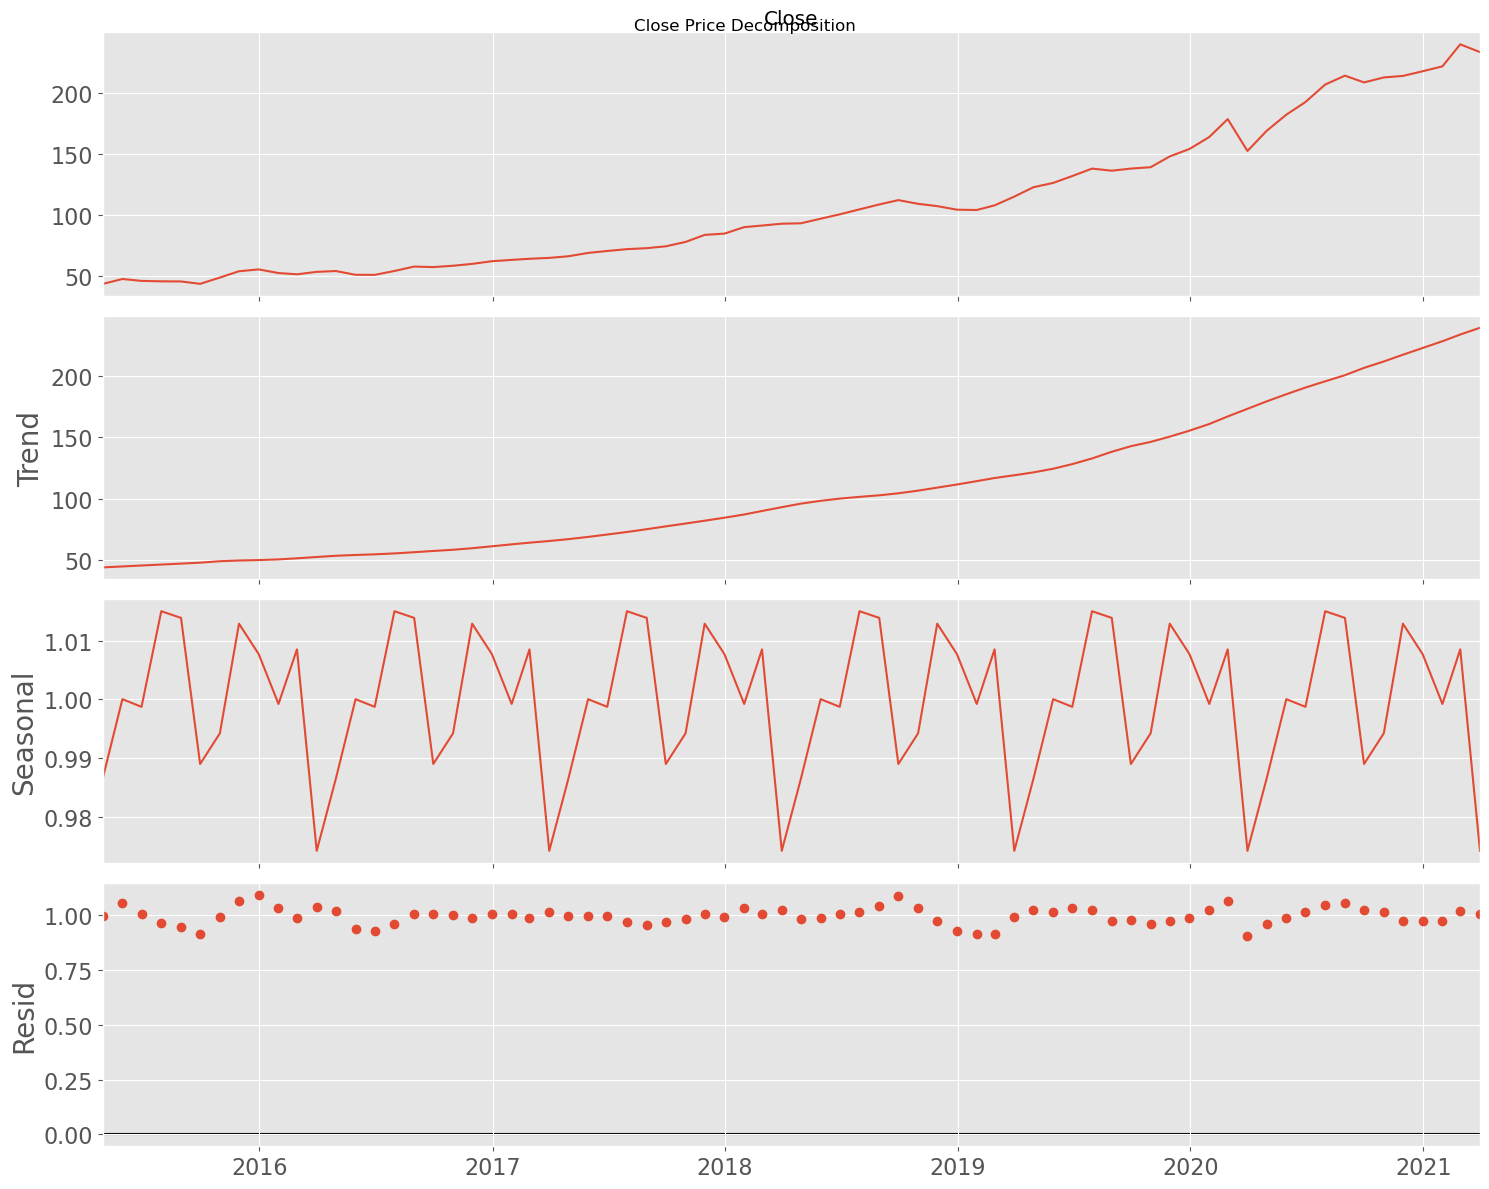

In [33]:
monthly = data["Close"]
monthly = monthly.resample("1M").mean()

rcParams["figure.figsize"] = 15, 12
rcParams["axes.labelsize"] = 20
rcParams["ytick.labelsize"] = 16
rcParams["xtick.labelsize"] = 16

decomposition = sm.tsa.seasonal_decompose(monthly, model="multiplicative", extrapolate_trend="freq", period=12)

decomp = decomposition.plot()
decomp.suptitle("Close Price Decomposition", fontsize=12);

## Observations

### Overall Close Price Plot
- There is a clear upward trend in the closing price year-over-year.

### Trend Plot
- As is evident, we can see a steady and continuous increase in closing price over the entire period

### Seasonal Plot
- The seasonal component oscillates around 1 showing regular cyclical patterns.
- The periodic peaks and troughs suggest a repeating seasonal effect on the closing prices.

### Residual Plot
- The residuals appear to be relatively stable around the value of 1 with no major outliers or irregular patterns suggesting that the model fits the data well.

### Summary
In summary the closing prices exhibit a strong upward trend with consistent seasonal fluctuations and relatively minor random variations indicating predictable patterns influenced by both long term trend growth and short term seasonal effects.

## Stationarity Check

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [35]:
def adf_test(series):
    print("ADF-Test Results: ")
    
    result = adfuller(series.dropna(), autolag="AIC")
    
    labels = ["ADF Test Statistic", "p-value", "# lags used", "# of observations"]
    out = pd.Series(result[0:4], index=labels)
    
    for k,v in result[4].items():
        out[f"critical value {k}"] = v
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("Data has unit root and is therefore non-stationary")

In [36]:
def KPSS(series):
    print("KPSS Test Results: ")
    
    result = kpss(series, regression="c")
    out = pd.Series(result[0:3], index=["KPSS Test Statistic", "p-value", "# lags used"])
    
    for k,v in result[3].items():
        out[f"critical value {k}"] = v
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Data has unit root and therefore non-stationary")
    else:
        print("Data has no unit root and therefore stationary")

In [37]:
y = data["Close"]
y = y.resample("1M").mean().reset_index()

adf_test(y["Close"])

ADF-Test Results: 
ADF Test Statistic     3.832784
p-value                1.000000
# lags used            5.000000
# of observations     66.000000
critical value 1%     -3.533560
critical value 5%     -2.906444
critical value 10%    -2.590724
Data has unit root and is therefore non-stationary


In [40]:
KPSS(y["Close"])

KPSS Test Results: 
KPSS Test Statistic    1.212387
p-value                0.010000
# lags used            5.000000
critical value 10%     0.347000
critical value 5%      0.463000
critical value 2.5%    0.574000
critical value 1%      0.739000
Data has unit root and therefore non-stationary


C:\Users\balaj\AppData\Local\Temp\ipykernel_23912\4249097388.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression="c")


In [41]:
y.head()

,Date,Close
0,2015-04-30,43.466667
1,2015-05-31,47.530000
2,2015-06-30,45.964091
3,2015-07-31,45.611818
4,2015-08-31,45.506667


In [42]:
from statsmodels.tsa.statespace.tools import diff

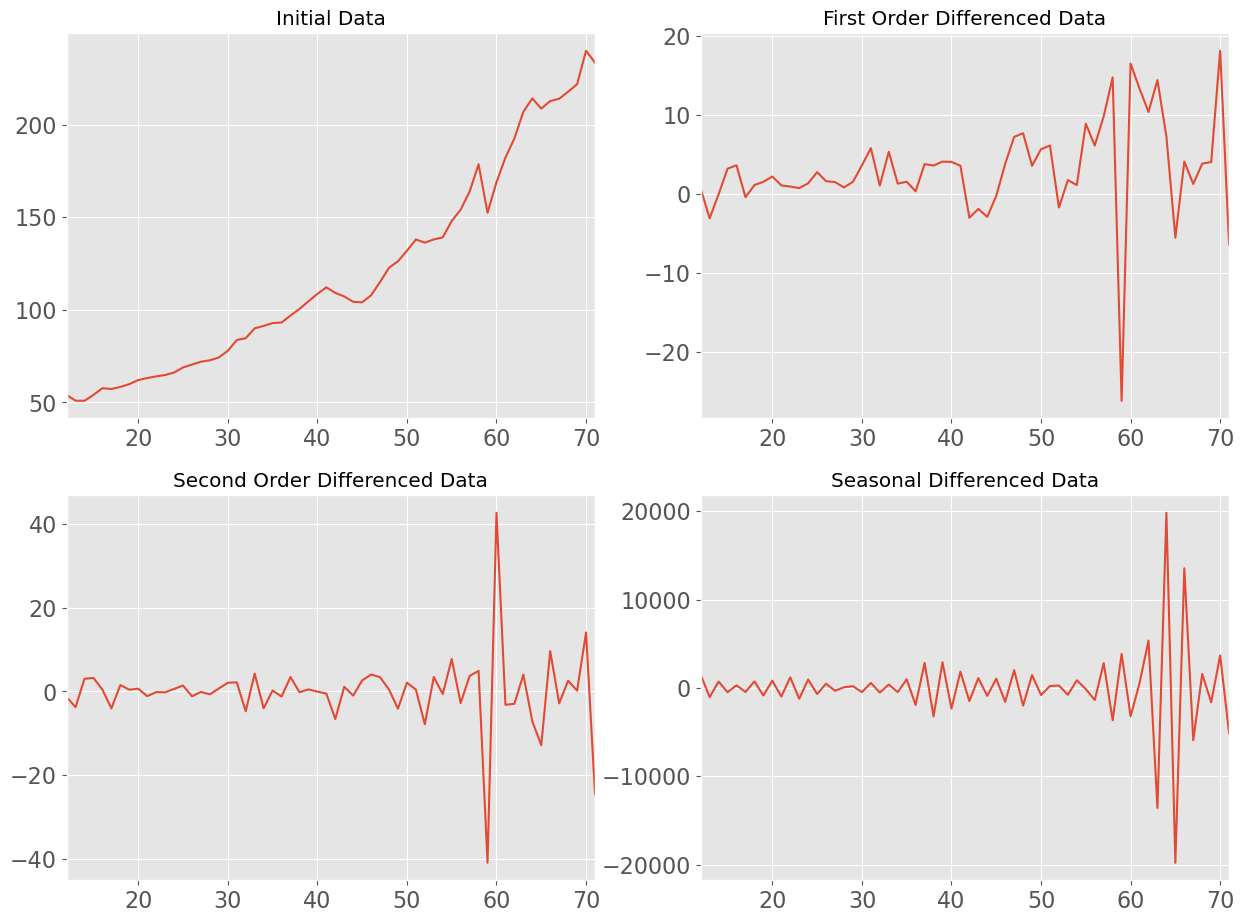

In [43]:
# Differencing to make data stationary
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))

y["Close_diff1"] = diff(y["Close"], k_diff=1)
y["Close_diff2"] = diff(y["Close"], k_diff=2)
y["seasonal_diff"] = diff(y["Close"], k_diff=12)


y = y.dropna()


y["Close"].plot(title="Initial Data", ax=ax[0][0]).autoscale(axis="x", tight=True)
y["Close_diff1"].plot(title="First Order Differenced Data", ax=ax[0][1]).autoscale(axis="x", tight=True)
y["Close_diff2"].plot(title="Second Order Differenced Data", ax=ax[1][0]).autoscale(axis="x", tight=True)
y["seasonal_diff"].plot(title="Seasonal Differenced Data", ax=ax[1][1]).autoscale(axis="x", tight=True);

In [45]:
adf_test(y["seasonal_diff"])

ADF-Test Results: 
ADF Test Statistic   -7.728394e+00
p-value               1.142639e-11
# lags used           1.100000e+01
# of observations     4.800000e+01
critical value 1%    -3.574589e+00
critical value 5%    -2.923954e+00
critical value 10%   -2.600039e+00
Data has no unit root and is stationary


In [46]:
from statsmodels.tsa.stattools import kpss

In [47]:
KPSS(y["seasonal_diff"])

KPSS Test Results: 
KPSS Test Statistic    0.073397
p-value                0.100000
# lags used            5.000000
critical value 10%     0.347000
critical value 5%      0.463000
critical value 2.5%    0.574000
critical value 1%      0.739000
Data has no unit root and therefore stationary


C:\Users\balaj\AppData\Local\Temp\ipykernel_23912\4249097388.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")


## Observation
- Second order differencing helps in making our data stationary. Although there is a spike, the ADF and KPSS test results indicates that our data has become strict stationary after seasonal differencing so the spike will not cause any issues with our model.

## Autocorrelation

In [48]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

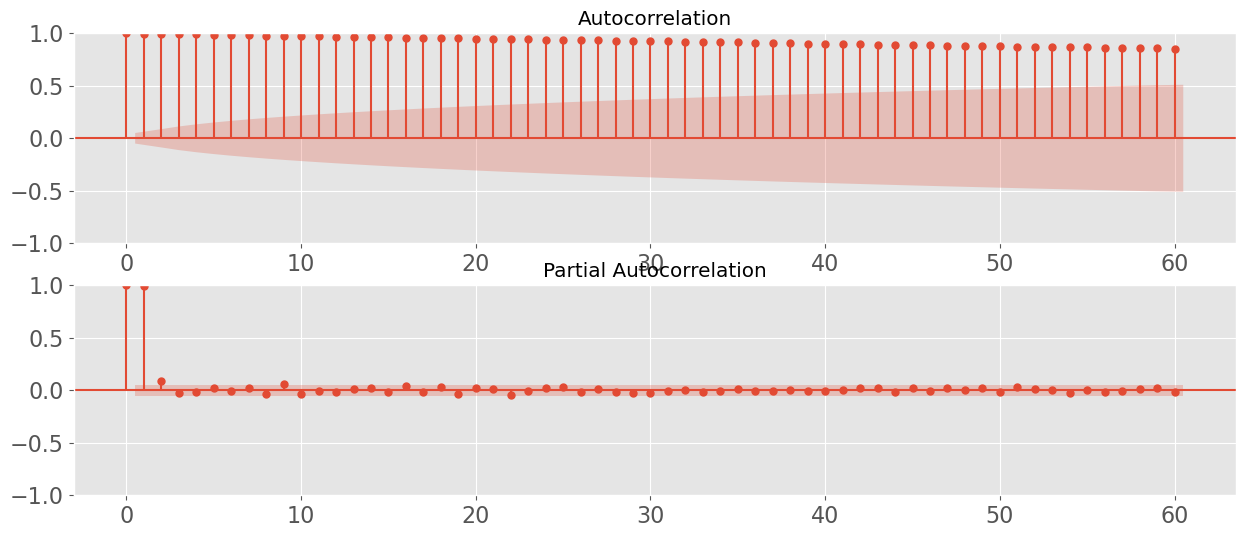

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

autocorr = acf(data["Close"], nlags=60, fft=False)

plot_acf(data["Close"].to_list(), lags=60, ax=ax[0], fft=False)
plot_pacf(data["Close"].to_list(), lags=60, ax=ax[1]);

## Observations
- The ACF's slow decay and the PACF's sharp cutoff after lag 1 indicates an autoregressive process i.e AR(1).
- The presence of significant autocorrelations across many lags in the ACF indicates that past values have effect on future values.

## Modeling

In [50]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
data.tail()

,Open,High,Low,Close,Volume,month,year,hour,dayofyear
Date,,,,,,,,,
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,3,2021,16,84
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,3,2021,16,85
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,3,2021,16,88
2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012,3,2021,16,89
2021-03-31 16:00:00,232.91,239.10,232.39,235.77,43623471,3,2021,16,90


In [56]:
df = data[["Open", "High", "Low", "Close", "Volume"]].copy()

In [57]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [58]:
df.index

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-02 16:00:00',
               '2015-04-06 16:00:00', '2015-04-07 16:00:00',
               '2015-04-08 16:00:00', '2015-04-09 16:00:00',
               '2015-04-10 16:00:00', '2015-04-13 16:00:00',
               '2015-04-14 16:00:00', '2015-04-15 16:00:00',
               ...
               '2021-03-18 16:00:00', '2021-03-19 16:00:00',
               '2021-03-22 16:00:00', '2021-03-23 16:00:00',
               '2021-03-24 16:00:00', '2021-03-25 16:00:00',
               '2021-03-26 16:00:00', '2021-03-29 16:00:00',
               '2021-03-30 16:00:00', '2021-03-31 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

In [59]:
df.asfreq("D")[:15]

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322.0
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476.0
2015-04-03 16:00:00,NaN,NaN,NaN,NaN,NaN
2015-04-04 16:00:00,NaN,NaN,NaN,NaN,NaN
2015-04-05 16:00:00,NaN,NaN,NaN,NaN,NaN
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692.0
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375.0
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438.0
2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861.0


In [60]:
df = df.asfreq("D", method="ffill")

In [61]:
df.index

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-02 16:00:00',
               '2015-04-03 16:00:00', '2015-04-04 16:00:00',
               '2015-04-05 16:00:00', '2015-04-06 16:00:00',
               '2015-04-07 16:00:00', '2015-04-08 16:00:00',
               '2015-04-09 16:00:00', '2015-04-10 16:00:00',
               ...
               '2021-03-22 16:00:00', '2021-03-23 16:00:00',
               '2021-03-24 16:00:00', '2021-03-25 16:00:00',
               '2021-03-26 16:00:00', '2021-03-27 16:00:00',
               '2021-03-28 16:00:00', '2021-03-29 16:00:00',
               '2021-03-30 16:00:00', '2021-03-31 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=2192, freq='D')

In [62]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-03 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-04 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-05 16:00:00,40.66,40.74,40.12,40.29,37487476


In [21]:
split = int(len(df)*0.8)
train_data, test_data = df[:split], df[split:]

In [24]:
split

1753

In [25]:
len(train_data)

1753

In [22]:
len(test_data)

439

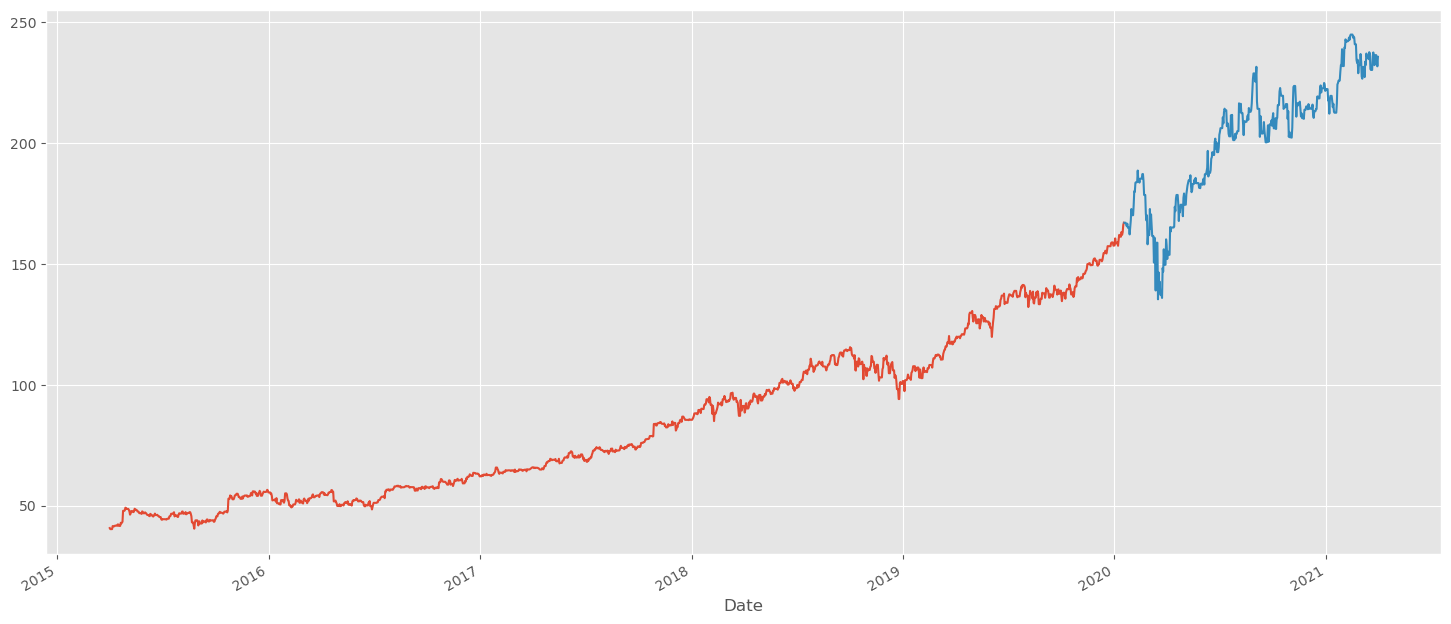

In [29]:
# Train-test plot
train_data["Close"].plot()
test_data["Close"].plot();

In [143]:
## Auto ARIMA

In [32]:
from pmdarima.arima import auto_arima

In [33]:
model = auto_arima(train_data["Close"], trace=True, error_action="ignore", suppress_warnings=True)
fitted = model.fit(train_data["Close"])
print(fitted.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5052.661, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5082.092, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5062.947, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5059.681, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5088.652, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5050.752, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5055.116, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5054.984, Time=1.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5052.712, Time=1.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5055.153, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5051.036, Time=0.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5052.168, Time=3.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5060.749, Time=0.81 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 12.721 seconds
                     

In [35]:
predictions = fitted.predict(n_periods=len(test_data["Close"]))

In [36]:
len(predictions)

439

In [37]:
predictions

2020-01-18 16:00:00    166.938773
2020-01-19 16:00:00    166.975599
2020-01-20 16:00:00    167.072153
2020-01-21 16:00:00    167.127122
2020-01-22 16:00:00    167.211045
2020-01-23 16:00:00    167.274809
2020-01-24 16:00:00    167.352608
2020-01-25 16:00:00    167.420635
2020-01-26 16:00:00    167.495466
2020-01-27 16:00:00    167.565559
2020-01-28 16:00:00    167.638951
2020-01-29 16:00:00    167.710047
2020-01-30 16:00:00    167.782741
2020-01-31 16:00:00    167.854323
2020-02-01 16:00:00    167.926679
2020-02-02 16:00:00    167.998496
2020-02-03 16:00:00    168.070688
2020-02-04 16:00:00    168.142619
2020-02-05 16:00:00    168.214732
2020-02-06 16:00:00    168.286718
2020-02-07 16:00:00    168.358792
2020-02-08 16:00:00    168.430805
2020-02-09 16:00:00    168.502861
2020-02-10 16:00:00    168.574887
2020-02-11 16:00:00    168.646933
2020-02-12 16:00:00    168.718966
2020-02-13 16:00:00    168.791008
2020-02-14 16:00:00    168.863043
2020-02-15 16:00:00    168.935083
2020-02-16 16:

In [39]:
pred_series = pd.Series(predictions, index=test_data.index)
pred_series

Date
2020-01-18 16:00:00    166.938773
2020-01-19 16:00:00    166.975599
2020-01-20 16:00:00    167.072153
2020-01-21 16:00:00    167.127122
2020-01-22 16:00:00    167.211045
2020-01-23 16:00:00    167.274809
2020-01-24 16:00:00    167.352608
2020-01-25 16:00:00    167.420635
2020-01-26 16:00:00    167.495466
2020-01-27 16:00:00    167.565559
2020-01-28 16:00:00    167.638951
2020-01-29 16:00:00    167.710047
2020-01-30 16:00:00    167.782741
2020-01-31 16:00:00    167.854323
2020-02-01 16:00:00    167.926679
2020-02-02 16:00:00    167.998496
2020-02-03 16:00:00    168.070688
2020-02-04 16:00:00    168.142619
2020-02-05 16:00:00    168.214732
2020-02-06 16:00:00    168.286718
2020-02-07 16:00:00    168.358792
2020-02-08 16:00:00    168.430805
2020-02-09 16:00:00    168.502861
2020-02-10 16:00:00    168.574887
2020-02-11 16:00:00    168.646933
2020-02-12 16:00:00    168.718966
2020-02-13 16:00:00    168.791008
2020-02-14 16:00:00    168.863043
2020-02-15 16:00:00    168.935083
2020-02-1

MSE: 679
RMSE: 26.049


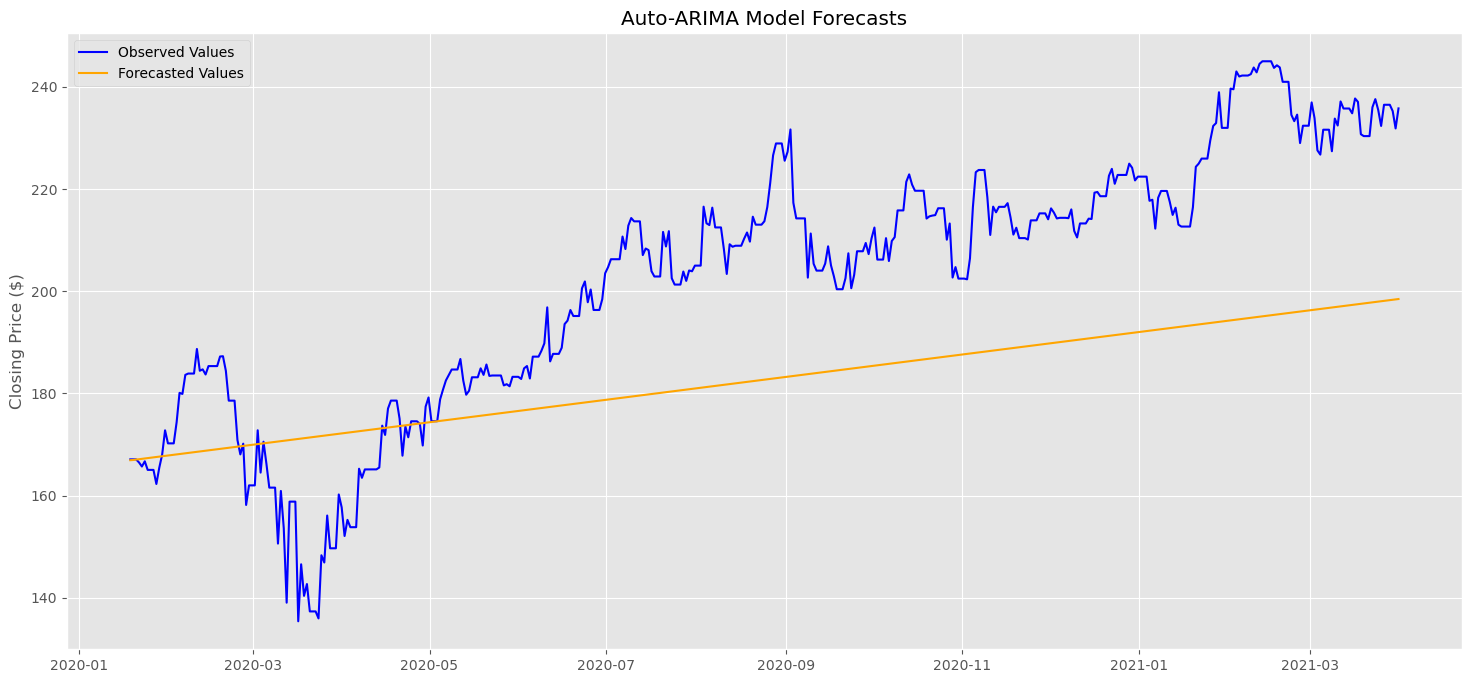

In [41]:
error = mean_squared_error(test_data["Close"], pred_series)
print("MSE: %3.f" % error)
print("RMSE: %.3f" % np.sqrt(error))

plt.plot(test_data["Close"], color="blue", label="Observed Values")
plt.plot(pred_series, color="orange", label="Forecasted Values")
plt.legend()
plt.title('Auto-ARIMA Model Forecasts')
plt.ylabel('Closing Price ($)')
plt.show();

In [30]:
train_data = train_data["Close"]
test_data = test_data["Close"]

Model run time: 337.1548659801483 seconds
MSE:  32
RMSE: 5.673


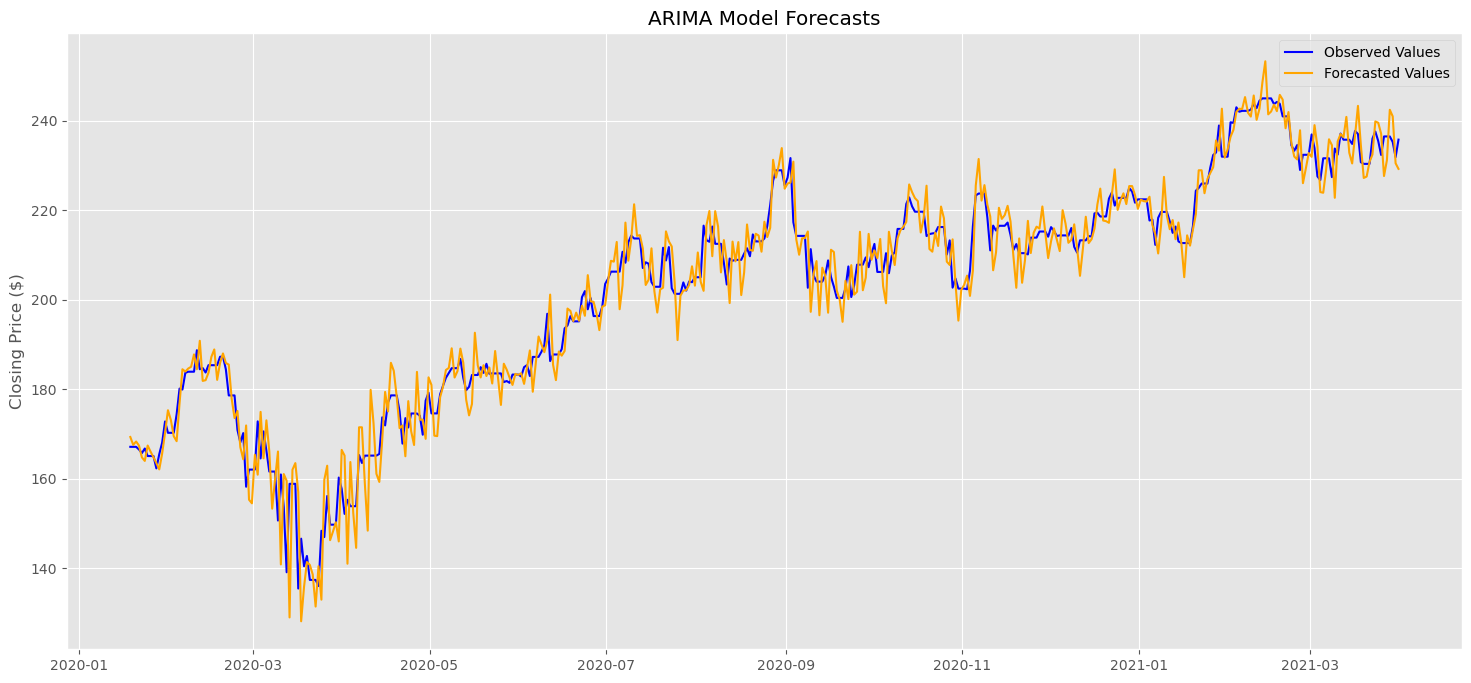

In [31]:
import time

sar_pred = []
history = [x for x in train_data]

start = time.time()
for t in range(len(test_data)):
    model = SARIMAX(history, order=(1,2,0), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    sar_pred.append(output[0])
    history.append(test_data[t])

end = time.time()
print(f"Model run time: {end-start} seconds")
sar_pred_series = pd.Series(sar_pred, index=test_data.index)

error = mean_squared_error(test_data, sar_pred_series)
print("MSE: %3.f" % error)
print("RMSE: %.3f" % np.sqrt(error))

plt.plot(test_data, color="blue", label="Observed Values")
plt.plot(sar_pred_series, color="orange", label="Forecasted Values")
plt.legend()
plt.title('ARIMA Model Forecasts')
plt.ylabel('Closing Price ($)')
plt.show();

### Baseline Model 
- Auto ARIMA model with order(1, 1, 2) was chosen as the baseline model and MSE and RMSE were chosen as the error metrics to assess the performance of the models.
- The model provided flat line forecasts and the respective test MSE and test RMSE were 679 and 26.049 suggesting a bad fit model

### Final Model
- A seasonal ARIMA model of order(1,2,0) and seasonal order(1,1,0,12) was chosen as the final model.The model orders were chosen based on the Autocorrelation and differencing plots
- The respective test MSE and test RMSE were 32 and 5.673 respectively beating the baseline model performance and seems to accurately capture the actual patterns.